In [35]:
# load packages
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


In [41]:
cicc_scatter = pd.read_csv('data/analysis/exploratory/cicc_scatter.csv')
cicc_scatterai = cicc_scatter[cicc_scatter['ai_activity_class'] == 1]

transform_dict = {'iloc_county_fips':'natural', 
                  #'EMA_aipat_9yr_2011':'log',
                  'EMA_pat_9yr_2011':'log', 
                  #'EMA_aipat_9yr_2019':'log', 
                  'EMA_pat_9yr_2019':'log',
                  'bach_pct_2011':'log', 
                  'burd_weight':'natural', 
                  'med_home_val_2011':'log', 
                  'pct_chg_mhv':'cube_root',
                  'fmr_2011':'log',
                  'pct_chg_fmr':'cube_root', 
                  'EMA_unemp_9yr_2011':'cube_root', 
                  'chg_EMA_unemp_9yr':'natural',
                  'NatAmenScale':'cube_root',
                  'EMA_ppk_chg':'log',
                  #'EMA_aippk_chg':'log', 
                  'hh_agi':'log', 
                  'Individuals':'log',
                  #'org_EMA_aipat_9yr_2011':'cube_root',
                  'org_EMA_pat_9yr_2011':'cube_root',
                  #'org_EMA_aipat_9yr_2019':'cube_root',
                  'org_EMA_pat_9yr_2019':'cube_root', 
                  'org_bach_pct_2011':'log',
                  'org_Individuals':'cube_root',
                  'org_burd_weight':'natural', 
                  'org_med_home_val_2011':'log',
                  'org_pct_chg_mhv':'natural', 
                  'org_fmr_2011':'natural', 
                  'org_pct_chg_fmr':'natural',
                  'org_EMA_unemp_9yr_2011':'natural', 
                  'org_chg_EMA_unemp_9yr':'natural', 
                  'org_NatAmenScale':'cube_root',
                  'org_EMA_ppk_chg':'cube_root',
                  #'org_EMA_aippk_chg':'cube_root', 
                  'net_pop_chg_domestic_indivs':'natural',
                  'ai_activity_class':'natural'}

def safe_cbrt(i):
    if i == 0:
        return 0
    else:
        return np.sign(i) * abs(i) ** (1/3)

def transform_df(df:pd.DataFrame, dict:dict) -> pd.DataFrame:
    _df = df
    _dict = dict
    for col in _dict.keys():
        _dist = {'natural': _df[col], 'cube_root': [safe_cbrt(i) for i in _df[col]], 'log': [np.log(i) for i in _df[col]]}
        _df[col] = _dist[_dict[col]]
        _df[col] = _df[col].fillna(np.mean(_df.loc[_df[col] != np.nan, col]))
    return _df[[col for col in _dict.keys()]]
    
cicc_final = transform_df(cicc_scatter, transform_dict)

display(cicc_final.isnull().sum())
display(cicc_final[cicc_final == np.inf].sum())
display(cicc_final.head(10))
display(cicc_final.describe())

C:\Users\TylerFrankenberg\AppData\Local\Temp\ipykernel_14140\304400821.py:51: RuntimeWarning: invalid value encountered in log
  _dist = {'natural': _df[col], 'cube_root': [safe_cbrt(i) for i in _df[col]], 'log': [np.log(i) for i in _df[col]]}
C:\Users\TylerFrankenberg\AppData\Local\Temp\ipykernel_14140\304400821.py:51: RuntimeWarning: divide by zero encountered in log
  _dist = {'natural': _df[col], 'cube_root': [safe_cbrt(i) for i in _df[col]], 'log': [np.log(i) for i in _df[col]]}


iloc_county_fips               0
EMA_pat_9yr_2011               0
EMA_pat_9yr_2019               0
bach_pct_2011                  0
burd_weight                    0
med_home_val_2011              0
pct_chg_mhv                    0
fmr_2011                       0
pct_chg_fmr                    0
EMA_unemp_9yr_2011             0
chg_EMA_unemp_9yr              0
NatAmenScale                   0
EMA_ppk_chg                    0
hh_agi                         0
Individuals                    0
org_EMA_pat_9yr_2011           0
org_EMA_pat_9yr_2019           0
org_bach_pct_2011              0
org_Individuals                0
org_burd_weight                0
org_med_home_val_2011          0
org_pct_chg_mhv                0
org_fmr_2011                   0
org_pct_chg_fmr                0
org_EMA_unemp_9yr_2011         0
org_chg_EMA_unemp_9yr          0
org_NatAmenScale               0
org_EMA_ppk_chg                0
net_pop_chg_domestic_indivs    0
ai_activity_class              0
dtype: int

iloc_county_fips               0.0
EMA_pat_9yr_2011               0.0
EMA_pat_9yr_2019               0.0
bach_pct_2011                  0.0
burd_weight                    0.0
med_home_val_2011              0.0
pct_chg_mhv                    0.0
fmr_2011                       0.0
pct_chg_fmr                    0.0
EMA_unemp_9yr_2011             0.0
chg_EMA_unemp_9yr              0.0
NatAmenScale                   0.0
EMA_ppk_chg                    0.0
hh_agi                         0.0
Individuals                    0.0
org_EMA_pat_9yr_2011           0.0
org_EMA_pat_9yr_2019           0.0
org_bach_pct_2011              0.0
org_Individuals                0.0
org_burd_weight                0.0
org_med_home_val_2011          0.0
org_pct_chg_mhv                0.0
org_fmr_2011                   0.0
org_pct_chg_fmr                0.0
org_EMA_unemp_9yr_2011         0.0
org_chg_EMA_unemp_9yr          0.0
org_NatAmenScale               0.0
org_EMA_ppk_chg                0.0
net_pop_chg_domestic

,iloc_county_fips,EMA_pat_9yr_2011,EMA_pat_9yr_2019,bach_pct_2011,burd_weight,med_home_val_2011,pct_chg_mhv,fmr_2011,pct_chg_fmr,EMA_unemp_9yr_2011,...,org_med_home_val_2011,org_pct_chg_mhv,org_fmr_2011,org_pct_chg_fmr,org_EMA_unemp_9yr_2011,org_chg_EMA_unemp_9yr,org_NatAmenScale,org_EMA_ppk_chg,net_pop_chg_domestic_indivs,ai_activity_class
0,1001,-3.373815,-3.213488,-1.999487,0.023788,11.831379,0.441728,6.599870,0.496575,1.869471,...,12.035929,0.356271,768.869565,0.193788,6.860456,-1.953220,1.127080,0.494532,-0.059072,0
1,1003,-2.666185,-2.058438,-1.706242,0.029183,12.076533,0.753818,6.638568,0.545477,1.897726,...,12.037749,0.372643,807.762712,0.186101,7.188482,-1.986860,1.048727,0.526804,0.470826,1
2,1005,-2.473651,-2.317230,-2.341404,0.027186,11.425187,-0.368393,6.289716,0.617644,2.132380,...,11.815586,0.225098,707.454545,0.207483,7.333125,-1.931860,0.587713,0.387805,-0.198664,1
3,1009,-3.578412,-3.355348,-2.583342,0.025489,11.621780,0.535213,6.666957,0.480137,1.882481,...,11.734968,0.180477,634.125000,0.152737,7.233862,-2.132532,0.833955,0.411336,-0.162730,0
4,1015,-3.012978,-2.848353,-2.253643,0.026181,11.508917,0.489997,6.371612,0.537810,1.993777,...,11.885446,0.327373,744.138889,0.197221,7.581958,-2.296448,0.860104,0.480006,-0.332316,1
5,1017,-3.333180,-1.996795,-2.610240,0.028257,11.319341,0.515466,6.284134,0.661285,2.251980,...,11.969474,0.294733,739.615385,0.234555,7.770119,-2.415455,0.494294,0.545690,0.188814,0
6,1019,-2.520193,-2.724679,-2.512883,0.027217,11.474185,0.470676,6.327937,0.495192,1.967527,...,11.677121,0.272556,648.777778,0.189026,8.341741,-2.614700,0.357147,0.368827,0.334953,0
7,1023,-2.425274,-0.883458,-2.587015,0.023082,11.025165,0.655184,6.284134,0.618794,2.172900,...,11.497377,0.101777,600.285714,0.213464,9.672941,-2.621140,0.745475,0.257878,-0.149168,0
8,1025,-2.530800,-3.002552,-2.422305,0.023429,11.288531,0.392713,6.284134,0.555743,2.358916,...,11.660138,0.181619,671.300000,0.141778,8.795069,-2.404697,0.838721,0.339911,-0.347658,0
9,1031,-2.683377,-3.098426,-1.973526,0.023702,11.710136,0.304428,6.311735,0.616329,1.864878,...,11.952091,0.298809,747.911765,0.213606,7.287775,-1.888022,1.012777,0.438783,-0.047492,1


,iloc_county_fips,EMA_pat_9yr_2011,EMA_pat_9yr_2019,bach_pct_2011,burd_weight,med_home_val_2011,pct_chg_mhv,fmr_2011,pct_chg_fmr,EMA_unemp_9yr_2011,...,org_med_home_val_2011,org_pct_chg_mhv,org_fmr_2011,org_pct_chg_fmr,org_EMA_unemp_9yr_2011,org_chg_EMA_unemp_9yr,org_NatAmenScale,org_EMA_ppk_chg,net_pop_chg_domestic_indivs,ai_activity_class
count,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,...,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000
mean,30370.304284,-1.862021,-1.424097,-2.041412,0.040598,11.825186,0.618916,6.549366,0.554073,1.921947,...,12.010007,0.349582,789.456940,0.210477,7.078038,-2.028369,0.198274,0.535394,0.001333,0.672083
std,14977.508956,0.956030,0.985144,0.382477,0.016407,0.446597,0.167148,0.230063,0.159976,0.181795,...,0.349437,0.156305,151.798353,0.052189,1.261555,0.647238,1.105947,0.186120,0.293977,0.469570
min,1001.000000,-6.769601,-5.449286,-3.188564,0.002005,10.980195,-0.488780,6.226537,-0.646665,1.263978,...,11.181640,-0.003848,517.333333,0.017641,3.095940,-4.545130,-1.707693,-0.837994,-2.192970,0.000000
25%,18122.000000,-2.529997,-2.126809,-2.305043,0.029702,11.489657,0.537599,6.388561,0.516279,1.808673,...,11.738865,0.237082,669.376923,0.181144,6.462127,-2.403333,-0.983152,0.469619,-0.119103,0.000000
50%,29143.000000,-1.988305,-1.463515,-2.072468,0.039489,11.767568,0.628820,6.483107,0.571277,1.924234,...,11.969743,0.333412,765.400000,0.207547,7.083443,-1.993950,0.742896,0.563872,-0.012359,1.000000
75%,42114.000000,-1.276213,-0.883458,-1.789279,0.050156,12.063068,0.700000,6.663133,0.627654,2.037690,...,12.265242,0.433670,882.264170,0.235748,7.834858,-1.646315,1.114798,0.639090,0.102314,1.000000
max,56045.000000,2.072931,2.416575,-0.704302,0.102816,13.809392,1.129563,7.513709,0.963846,2.873493,...,13.108467,1.289500,1461.000000,0.572363,12.129753,0.195093,2.006645,1.192431,1.642747,1.000000


In [42]:
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.api as sm

class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
        return self
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

cicc_trains = {}
cicc_tests = {}

for i in range(0, 10):
    cicc_trains[i], cicc_tests[i] = train_test_split(cicc_final, train_size=0.8, random_state = i + 1)


lin_regs = {}
X = {}
scores = {}

cols = [col for col in cicc_final.columns if col not in ['iloc_county_fips', 'net_pop_chg_domestic_indivs']]

for col in cols:
    lms = {}

    for i in range(0, 10):    
        y = cicc_trains[i]['net_pop_chg_domestic_indivs']
        X[col] = cicc_trains[i][col]
        X[col] = sm.add_constant(X[col])
        
        lms[i] = sm.OLS(y, X[col]).fit()

    lin_regs[col] = lms

lin_regs_df = pd.DataFrame({
    'R-squared': [np.mean([lin_regs[col][i].rsquared for i in range(0, 10)]) for col in cols],
    'R-squared_adj': [np.mean([lin_regs[col][i].rsquared_adj for i in range(0, 10)]) for col in cols],
    'Fvalue': [np.mean([lin_regs[col][i].fvalue for i in range(0, 10)]) for col in cols],
    'prob-F': [np.mean([lin_regs[col][i].f_pvalue for i in range(0, 10)]) for col in cols],    
    'sig_F': 'no',
    'log-likelihood': [np.mean([lin_regs[col][i].llf for i in range(0, 10)]) for col in cols],    
    'AIC': [np.mean([lin_regs[col][i].aic for i in range(0, 10)]) for col in cols],
    'BIC': [np.mean([lin_regs[col][i].bic for i in range(0, 10)]) for col in cols],
    'x-var': [col for col in cols],
    'pvalue': [np.mean([lin_regs[col][i].pvalues[col] for i in range(0, 10)]) for col in cols],
    'sig_x': 'no'
    })

lin_regs_df.loc[lin_regs_df['prob-F'] < 0.05, 'sig_F'] = 'yes'
lin_regs_df.loc[lin_regs_df['pvalue'] < 0.05, 'sig_x'] = 'yes'

display(lin_regs_df.sort_values('R-squared', ascending=False))

,R-squared,R-squared_adj,Fvalue,prob-F,sig_F,log-likelihood,AIC,BIC,x-var,pvalue,sig_x
12,0.090186,0.089625,160.802719,3.355879e-34,yes,-236.203430,476.406859,487.192154,hh_agi,3.355879e-34,yes
5,0.058408,0.057827,100.641617,2.872660e-21,yes,-264.079353,532.158707,542.944002,pct_chg_mhv,2.872660e-21,yes
4,0.045090,0.044501,76.614969,8.731952e-17,yes,-275.484242,554.968485,565.753780,med_home_val_2011,8.731952e-17,yes
19,0.043392,0.042803,73.590448,1.394895e-16,yes,-276.928824,557.857648,568.642943,org_med_home_val_2011,1.394895e-16,yes
21,0.038938,0.038345,65.734521,2.043414e-14,yes,-280.700617,565.401233,576.186529,org_fmr_2011,2.043414e-14,yes
6,0.024648,0.024047,41.007154,1.341204e-09,yes,-292.685191,589.370383,600.155678,fmr_2011,1.341204e-09,yes
10,0.024290,0.023688,40.397917,2.247763e-09,yes,-292.983024,589.966047,600.751343,NatAmenScale,2.247763e-09,yes
16,0.022334,0.021731,37.065532,1.137910e-08,yes,-294.610692,593.221384,604.006679,org_bach_pct_2011,1.137910e-08,yes
20,0.022211,0.021608,36.859644,1.874340e-08,yes,-294.712175,593.424350,604.209645,org_pct_chg_mhv,1.874340e-08,yes
15,0.022034,0.021431,36.572022,5.918592e-08,yes,-294.856227,593.712454,604.497749,org_EMA_pat_9yr_2019,5.918592e-08,yes


In [46]:
cicc_lm = lin_regs['ai_activity_class'][0]
X = X['ai_activity_class'][0]

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid
    
    fig1 = px.scatter(x=fitted_vals, y=y, trendline="lowess", trendline_color_override="red")
    fig1.update_layout(title='Observed vs. Predicted Values')

    fig2 = px.scatter(x=fitted_vals, y=resids, trendline="lowess", trendline_color_override="red")
    fig2.update_layout(title='Residuals vs. Predicted Values')
    
    fig1.show()
    fig2.show()

linearity_test(cicc_lm, y)    


c:\Users\TylerFrankenberg\anaconda3\envs\MSCapstone\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
c:\Users\TylerFrankenberg\anaconda3\envs\MSCapstone\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning:

invalid value encountered in divide



In [47]:
cicc_lm.resid.mean()

-1.586032892321652e-17

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

IndexError: invalid index to scalar variable.

In [50]:
import statsmodels.stats.api as sms

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig1 = px.scatter(x=fitted_vals, y=resids, trendline="lowess", trendline_color_override="red")
    fig1.update_layout(title='Residuals vs. Predicted Values')

    fig2 = px.scatter(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), trendline="lowess", trendline_color_override="red")
    fig2.update_layout(title='Scale-Location')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

    fig1.show()
    fig2.show()

homoscedasticity_test(cicc_lm)


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  3.496632
p-value                        0.061494
f-value                        3.499861
f p-value                      0.061554

 Goldfeld-Quandt test ----
                value
F statistic  1.072071
p-value      0.161109

 Residuals plots ----


c:\Users\TylerFrankenberg\anaconda3\envs\MSCapstone\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning:

invalid value encountered in divide

c:\Users\TylerFrankenberg\anaconda3\envs\MSCapstone\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning:

invalid value encountered in divide



C:\Users\TylerFrankenberg\AppData\Local\Temp\ipykernel_14140\113061791.py:4: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



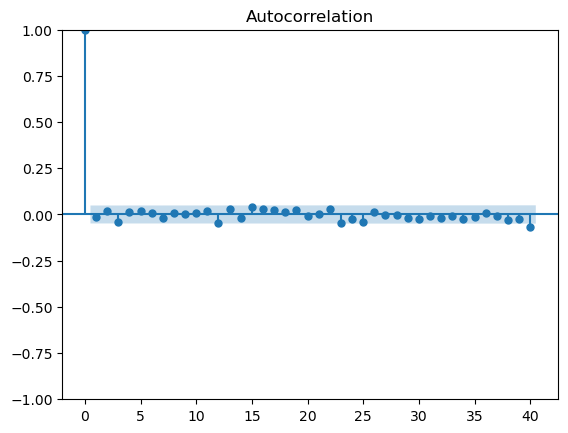

In [51]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(cicc_lm.resid, lags=40 , alpha=0.05)
acf.show()

In [52]:
from scipy.stats import pearsonr

for column in X.columns:
    corr_test = pearsonr(X[column], cicc_lm.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

AttributeError: 'numpy.int64' object has no attribute 'columns'

In [ ]:
X.apply(np.var, axis=0)

const     0.000000
hh_agi    0.074701
dtype: float64

Jarque-Bera test ---- statistic: 5214.6817, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.8635, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.3039, p-value: 0.0000
Anderson-Darling test ---- statistic: 53.6256, 5% critical value: 0.7850
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


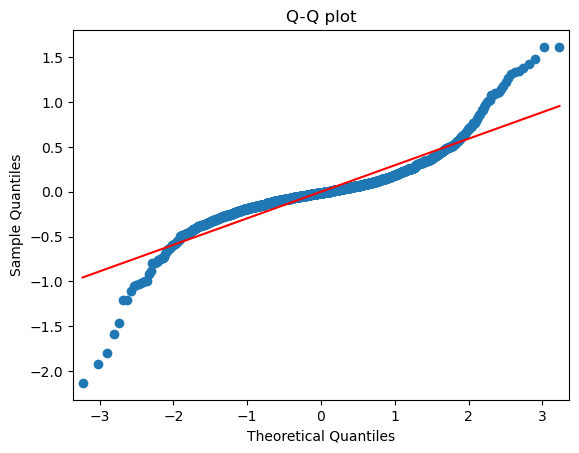

In [53]:
from scipy import stats
from matplotlib import pyplot as plt

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(cicc_lm)

Critical Cooks distance: 0.0024630541871921183
[0.00383568 0.00305103 0.00259988 0.00267999 0.01094066 0.00769859
 0.00848418 0.00690942 0.00307044 0.00729258 0.00334614 0.00588875
 0.00270978 0.00758613 0.00932145 0.01000015 0.00903702 0.02695982
 0.00291475 0.0036363  0.00612113 0.0044834  0.00830374 0.00311478
 0.00383185 0.0130197  0.03921288 0.00642819 0.00555062 0.0035225
 0.00529524 0.0049248  0.01119022 0.00318407 0.0067077  0.01370545
 0.01292583 0.00574877 0.00489169 0.00338353 0.00284986 0.00523226
 0.00263176 0.01055805 0.00262138 0.00423498 0.00257117 0.00618172
 0.00946465 0.00252118 0.00892787 0.00251295 0.01938255 0.00614106
 0.00298701 0.00250349 0.00646352 0.00279347 0.00267879 0.0053422
 0.00662608 0.00616909 0.00439857 0.00709802 0.01060656 0.00258862
 0.00573326 0.0105915  0.00379877 0.00277355 0.00342708 0.00332062
 0.00654584 0.00275547 0.00442084 0.00371787 0.00305285 0.01146909
 0.00786756 0.00256876 0.00800243 0.00434303 0.02779962 0.0057507
 0.00367628 0.0184

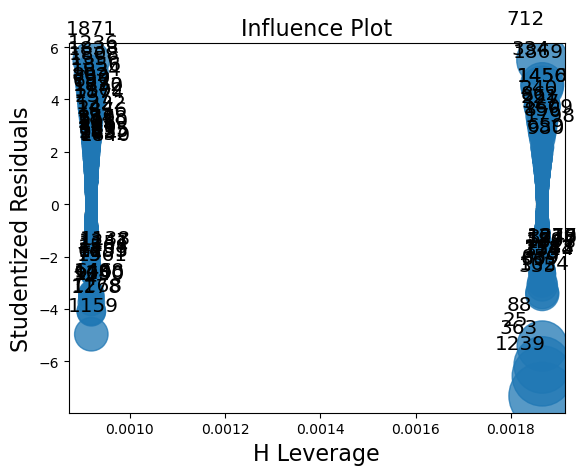

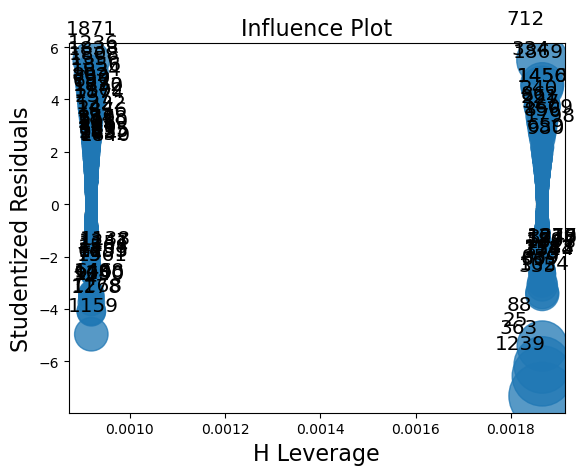

In [54]:
infl = cicc_lm.get_influence()
sm_fr = infl.summary_frame()

# obtain Cook's distance 
lm_cooksd = cicc_lm.get_influence().cooks_distance[0]

# calculate critical d
critical_d = 4/cicc_lm.nobs
print('Critical Cooks distance:', critical_d)

# identification of potential outliers with leverage
out_d = lm_cooksd > critical_d

# output potential outliers with leverage
print(lm_cooksd[out_d])

sm.graphics.influence_plot(cicc_lm, criterion="cooks")

